Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [1]:
!pip install pymystem3

In [2]:
import re

In [3]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [7]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [8]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [ ]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [ ]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [10]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [11]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [12]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [13]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [14]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [15]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [16]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [ ]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [37]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [36]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [35]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [40]:
text_2 = 'I love, cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)

In [42]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [ ]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

In [34]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

FileNotFoundError: [Errno 2] No such file or directory: 'text_morph.txt'

In [33]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

NameError: name 'txt' is not defined

Сколько у нас частей речи определенного вида?

In [32]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

NameError: name 'resulting_text' is not defined

In [27]:
from nltk import FreqDist

In [28]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [30]:
stop_words = set(stopwords.words("english"))

In [31]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

NameError: name 'tokenized_txt' is not defined

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

In [5]:
english_text = '''So, this question I don't think can have a definitive answer, but I think it does have a confident 'No'. To be sure, Hitler was reported to be someone who enjoyed watching films. It is also often said that he particularly loved Disney's 1937 Snow White, although just how much he loved it might get a bit inflated un pop culture reference. Certainly, the claims that he made personal sketches of the dwarfs, as well as one of Pinocchio from the 1940 Disney film, turned out to be a hoax. The most definitive thing that we know is that an order for a print of the film was made in 1938 for it to be delivered to the Berghof, before it had even been made available in Germany generally, but whether he watched it is actually a little in question! There are claims that he loved it and watched it a number of times and that it was even his "most cherished" film (and possibly was the impetus for why actively sought to bring it to the German market). But while Giesen & Storm find it compelling, Niven in particular stresses that we need to take those claims with a grain of salt as it comes from second hand recollection long after the war. Honestly though, I think we can probably assume he saw it even if there is some hyperbole perhaps about how much he liked it.
For the more short form stuff, when it comes to American animation, we know that Hitler definitely had some familiarity with Mickey Mouse. In 1937 Goebbels recorded in his diary having gifted Hitler a bundle of films staring The Mouse, and that "he is so happy about this treasure". The Christmas present wasn't the first exposure either most likely, since five earlier films had been ordered for the Berghof. However, while Hitler seems to have had affinity for Disney, or at least Mickey, there doesn't seem to have been any exposure to the Warner Bros characters, including Bugs. It is also worth noting that while Hitler could likely have gotten ahold of Warner Bros. stuff via special acquisitions, the company was perhaps the most anti-Nazi in Hollywood during the 1930s (the brothers were Jewish) so distribution in Nazi Germany of Warner Bros. features was basically zilch, having ended business there in 1934, and it seems likely Hitler would have actively avoided properties known to be Jewish run, although sources are ultimately silent.
Even aside from warner Bros in particular though, we also can say that even by 1940, the import of American films was at a trickle, with only a small number able to distribute in Germany, and perhaps most critically for our purposes, by the time Wabbit Trouble was released, an additional impediment had come about, as it was released in late December... of 1941. Which is to say, after the US and Germany were at war. As such, between that and the Warner Bros policy, there is a 0.0% chance that Wabbit Trouble had any sort of official release in Germany. I don't need to dig through any sources to say that with confidence...
Which comes to then the final conclusion, which is that, while we don't have an exhaustive list of everything Hitler did every minute of the day, we have no sources to say he watched it. And to have the possibility of doing so would be an illicit copy would have needed to be acquired, and smuggled into Germany, and specifically provided to Hitler. That is a lot of things that need to happen, any single one of them impossibly rare and basically without reason - it obviously being just one random short which lacked the, er, cultural importance, now granted it by Big Chungus - and thus in the final estimation just completely and absolutely beyond any possibility.
So as I said at the start, technically speaking, we can't prove this to the true sense of definitive, but while Hitler did have some appreciation for American animation, generally, he was an AfD (Adult Fan of Disney) by all accounts, so we can pretty safely say that if he was having a top secret operation to acquire and smuggle in American films while at war with the US, it wouldn't have been a random Bugs Bunny short, but probably Bambi (which, to be very clear, he didn't do!).'''

In [43]:
russian_text = '''
Вот, казалось бы, состоятельный человек или политик — а у него вовсе нет смартфона и всех популярных мессенджеров. Казалось бы, парадокс: такие люди могут позволить себе последний iPhone или дорогущий раскладной Samsung, но нет — они предпочитают кнопочные телефоны. А знаете почему? Есть несколько причин.
Высокий уровень конфиденциальности
Большинство кнопочных телефонов очень примитивные — «операционная система» намертво вшита в микросхему ПЗУ, и изменить что-то в ней невозможно. А это значит, что кнопочный телефон не поддерживает установку приложений.
И здесь все просто — состоятельные люди и политики заботятся о своей конфиденциальности, чтобы не стать жертвой так называемого «адресного взлома», когда хакеры взламывают аппарат конкретного человека. Кнопочную «звонилку» невозможно взломать, на нее нельзя установить шпионские приложения и отследить пользователя. К тому же, в ней нет Wi-Fi и Bluetooth, по которым с близкого расстояния также можно в теории отследить.
В кнопочном телефоне нет GPS и возможности установки приложений, а значит, злоумышленнику сложно получить точную геопозицию владельца.
Но не все кнопочные телефоны в этом плане хороши — существуют модели на операционной системе KaiOS, которая поддерживает установку приложений. Также есть модели на Android, а сам аппарат поддерживает GPS, Wi-Fi и Bluetooth. Кнопочный телефон, как правило, не имеет камеры, и это также плюс.
Вычислить месторасположение абонента с кнопочным телефоном можно только в том случае, если есть доступ к оператору связи: делается это по базовым станциям.
А вот современный смартфон собирает огромное количество данных о пользователе, которые в теории можно получить удаленным способом. Почему в теории? Все просто, здесь работает аксиома: любое устройство, подключенное к интернету, в теории всегда уязвимо. На любой замок может найтись ключ!
Также в кнопочном телефоне невозможно перейти по ссылке из электронной почты и стать жертвой фишинга или любых других атак, которые достигаются путем социальной инженерии.
Здесь важно знать, что никто не будет взламывать обычного человека — он может стать лишь жертвой массового взлома, а вот известных людей часто взламывают ради получения информации или шантажа. Обычному человеку беспокоиться не о чем.
Меньше инфополя
Современный смартфон — огромный информационный поток. Социальные сети, мессенджеры, браузер, новости, уведомления — все это отвлекает. Вот, например, Павел Дуров вовсе не пользуется смартфоном, хоть и является основателем мессенджера Telegram: он ему не нужен, так как просто отвлекает его от более важных дел.
Да, конечно, у политиков и состоятельных людей есть помощники, которые ведут социальные сети, получают информацию и даже общаются с близкими и друзьями. Деловой и занятой человек предпочитает телефонный разговор вместо переписки — разговор подразумевает быстрое решение вопроса, чем ждать ответа на сообщения.
Кнопочный телефон позволяет сосредоточиться на текущей работе, встрече или переговорах, не отвлекаясь на бесконечный поток информации.
Для многих это способ уменьшить информационный шум и цифровую зависимость, сохраняя при этом базовую связь.
Использование кнопочного телефона — это мощный пиар-ход. Он формирует образ аскетичного и прагматичного лидера, который сосредоточен на сути, а не на внешних атрибутах. Такой имидж подчеркивает рациональность и близость к простым людям, что особенно выигрышно смотрится на фоне электората.
А еще кнопочный телефон:
Большинство аппаратов очень прочные. Если дисплей смартфона разбит, то он превращается в кирпич, и иной раз невозможно даже экстренный вызов совершить;
Аккумулятора может хватать на неделю. В нем нет доступа в сеть, а передача данных расходует большое количество энергии;
Некоторые модели, особенно выпущенные в «нулевые», имеют очень чувствительный приемник и мощный передатчик: в то время базовых станций было мало, и телефоны создавали исходя из обстановки. Иной раз кнопочный телефон в лесу будет работать, а смартфон — нет.
А еще им удобно пользоваться в перчатках.'''

In [77]:
!pip install nltk spacy pymorphy2
!python -m spacy download ru_core_news_sm

import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))
nlp_ru = spacy.load("ru_core_news_sm")
english_stopwords = set(stopwords.words('english'))
nlp_en = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 96.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from nltk import FreqDist

In [3]:
def no_trash_text(text):
    punctuation = string.punctuation
    translator = str.maketrans('', '', punctuation)
    text = text.translate(translator)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join(text.split())
    return text

['question', 'dont', 'think', 'definitive', 'answer', 'think', 'confident', 'sure', 'hitler', 'reported', 'someone', 'enjoyed', 'watching', 'films', 'also', 'often', 'said', 'particularly', 'loved', 'disneys', 'snow', 'white', 'although', 'much', 'loved', 'might', 'get', 'bit', 'inflated', 'un', 'pop', 'culture', 'reference', 'certainly', 'claims', 'made', 'personal', 'sketches', 'dwarfs', 'well', 'one', 'pinocchio', 'disney', 'film', 'turned', 'hoax', 'definitive', 'thing', 'know', 'order', 'print', 'film', 'made', 'delivered', 'berghof', 'even', 'made', 'available', 'germany', 'generally', 'whether', 'watched', 'actually', 'little', 'question', 'claims', 'loved', 'watched', 'number', 'times', 'even', 'cherished', 'film', 'possibly', 'impetus', 'actively', 'sought', 'bring', 'german', 'market', 'giesen', 'storm', 'find', 'compelling', 'niven', 'particular', 'stresses', 'need', 'take', 'claims', 'grain', 'salt', 'comes', 'second', 'hand', 'recollection', 'long', 'war', 'honestly', 'tho

<Axes: xlabel='Samples', ylabel='Counts'>

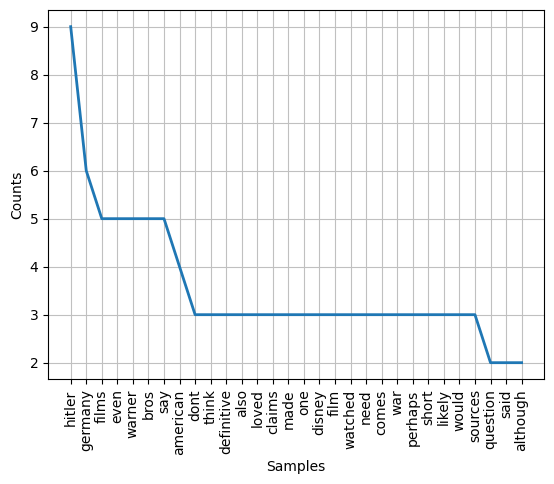

In [76]:
from nltk.tokenize import word_tokenize
import nltk
import string
english_text = no_trash_text(english_text)
russian_text = no_trash_text(russian_text)
# Первый способ с простыми токенами
eng_text_tokens_nltk = word_tokenize(english_text)
rus_text_tokens_nltk = word_tokenize(russian_text)
eng_filtered_tokens = [token for token in eng_text_tokens_nltk if token not in english_stopwords]
rus_filtered_tokens = [token for token in rus_text_tokens_nltk if token not in russian_stopwords]
print(eng_filtered_tokens)
print(rus_filtered_tokens)
frequency_distribution_1 = FreqDist(eng_filtered_tokens)
frequency_distribution_1.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

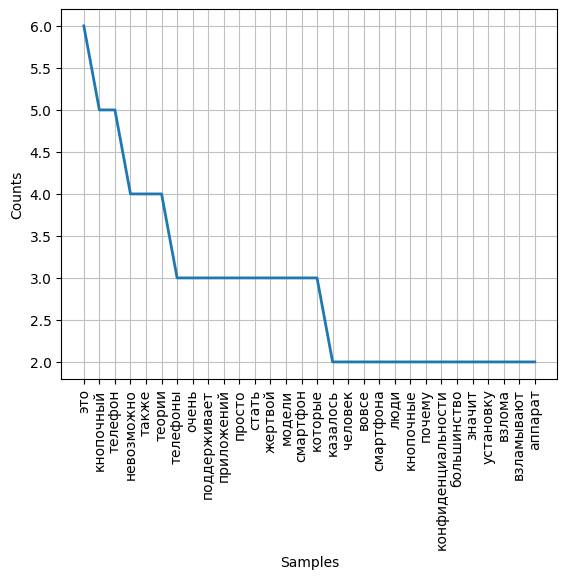

In [47]:
frequency_distribution_1 = FreqDist(rus_filtered_tokens)
frequency_distribution_1.plot(30, cumulative=False)

In [13]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [49]:
tagged_eng = nltk.pos_tag(eng_filtered_tokens)
tagged_rus = nltk.pos_tag(rus_filtered_tokens)
# Второй способ с разметкой на части речи
eng_list_of_tagged = []
for elem in tagged_eng:
    tag_tog = '_'.join(elem)
    eng_list_of_tagged.append(tag_tog)
print(eng_list_of_tagged)
rus_list_of_tagged = []
for elem in tagged_rus:
    tag_tog = '_'.join(elem)
    rus_list_of_tagged.append(tag_tog)
print(rus_list_of_tagged)


['question_NN', 'dont_NN', 'think_VBP', 'definitive_JJ', 'answer_NN', 'think_VBP', 'confident_JJ', 'sure_JJ', 'hitler_NN', 'reported_VBD', 'someone_NN', 'enjoyed_VBD', 'watching_VBG', 'films_NNS', 'also_RB', 'often_RB', 'said_VBD', 'particularly_RB', 'loved_VBN', 'disneys_NNS', 'snow_VBP', 'white_JJ', 'although_IN', 'much_JJ', 'loved_VBD', 'might_MD', 'get_VB', 'bit_RB', 'inflated_JJ', 'un_JJ', 'pop_NN', 'culture_NN', 'reference_NN', 'certainly_RB', 'claims_VBZ', 'made_VBN', 'personal_JJ', 'sketches_NNS', 'dwarfs_RB', 'well_RB', 'one_CD', 'pinocchio_NN', 'disney_NN', 'film_NN', 'turned_VBD', 'hoax_JJ', 'definitive_JJ', 'thing_NN', 'know_JJ', 'order_NN', 'print_NN', 'film_NN', 'made_VBD', 'delivered_VBN', 'berghof_NNS', 'even_RB', 'made_VBD', 'available_JJ', 'germany_JJ', 'generally_RB', 'whether_IN', 'watched_VBN', 'actually_RB', 'little_JJ', 'question_NN', 'claims_NNS', 'loved_VBD', 'watched_JJ', 'number_NN', 'times_NNS', 'even_RB', 'cherished_VBD', 'film_NN', 'possibly_RB', 'impetus_

<Axes: xlabel='Samples', ylabel='Counts'>

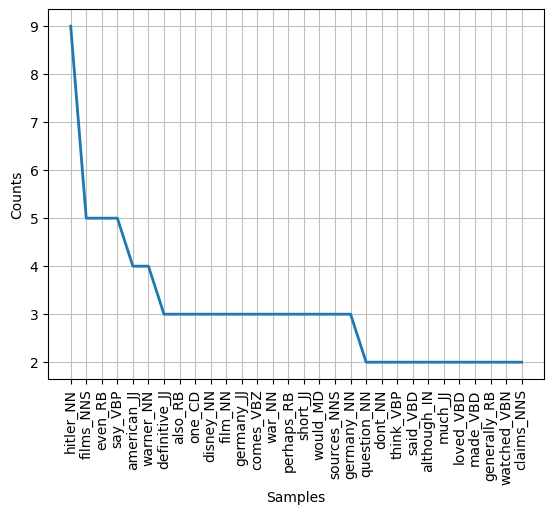

In [16]:
frequency_distribution_3 = FreqDist(eng_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

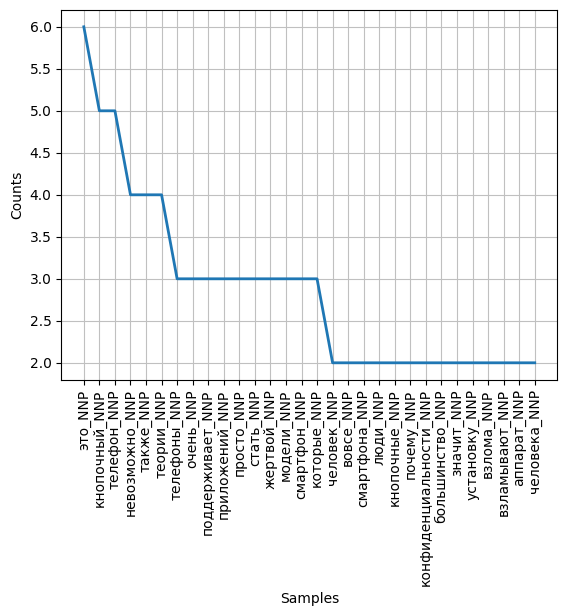

In [50]:
frequency_distribution_3 = FreqDist(rus_list_of_tagged)
frequency_distribution_3.plot(30, cumulative=False)

In [69]:
from nltk.stem import WordNetLemmatizer
from pymystem3 import Mystem
mystem = Mystem()
stop_words = set(stopwords.words('russian'))


In [74]:
# Третий способ с леммами
wordnet_lemmatizer = WordNetLemmatizer()
lemmas_eng = []
for token in eng_filtered_tokens:
  lemmas_eng.append(wordnet_lemmatizer.lemmatize(token))
lemmas = mystem.lemmatize(russian_text)
lemmas_rus = []
for lemma in lemmas:
    lemma = lemma.strip().lower()
    if lemma and lemma.isalpha():
        if lemma in stop_words:
            continue
        lemmas_rus.append(lemma)
print(lemmas_eng)
print(lemmas_rus)

['question', 'dont', 'think', 'definitive', 'answer', 'think', 'confident', 'sure', 'hitler', 'reported', 'someone', 'enjoyed', 'watching', 'film', 'also', 'often', 'said', 'particularly', 'loved', 'disney', 'snow', 'white', 'although', 'much', 'loved', 'might', 'get', 'bit', 'inflated', 'un', 'pop', 'culture', 'reference', 'certainly', 'claim', 'made', 'personal', 'sketch', 'dwarf', 'well', 'one', 'pinocchio', 'disney', 'film', 'turned', 'hoax', 'definitive', 'thing', 'know', 'order', 'print', 'film', 'made', 'delivered', 'berghof', 'even', 'made', 'available', 'germany', 'generally', 'whether', 'watched', 'actually', 'little', 'question', 'claim', 'loved', 'watched', 'number', 'time', 'even', 'cherished', 'film', 'possibly', 'impetus', 'actively', 'sought', 'bring', 'german', 'market', 'giesen', 'storm', 'find', 'compelling', 'niven', 'particular', 'stress', 'need', 'take', 'claim', 'grain', 'salt', 'come', 'second', 'hand', 'recollection', 'long', 'war', 'honestly', 'though', 'think

<Axes: xlabel='Samples', ylabel='Counts'>

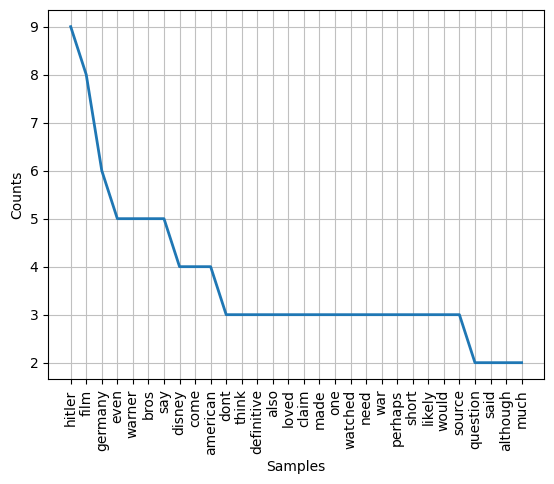

In [33]:
frequency_distribution_4 = FreqDist(lemmas_eng)
frequency_distribution_4.plot(30, cumulative=False)

<Axes: xlabel='Samples', ylabel='Counts'>

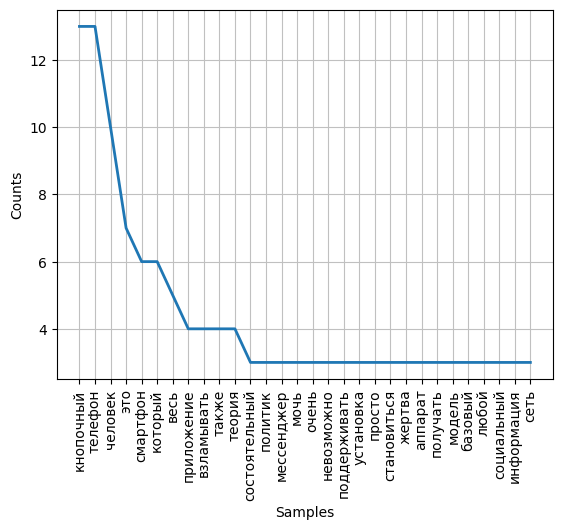

In [75]:
frequency_distribution_4 = FreqDist(lemmas_rus)
frequency_distribution_4.plot(30, cumulative=False)